# 用いるデータ

<a href="http://mh.rgr.jp/memo/mq0111.htm" target="_blank">分子性物質のデータ（融点・沸点）</a>

In [1]:
import pandas as pd
data = [['HF', 19.5, 20.0],
        ['HCl', -84.9, 36.5],
        ['HBr', -67.0, 80.9],
        ['HI', -35.1, 127.9],
        ['H2O', 100.0, 18.0],
        ['H2S', -60.7, 34.1],
        ['H2Se', -42, 81.0],
        ['H2Te', -1.8, 129.6],
        ['NH3', -33.4, 17.0],
        ['PH3', -87, 34.0],
        ['AsH3', -55, 77.9],
        ['SbH3', -17.1, 124.8],
        ['CH4', -161.49, 16.0],
        ['SiH4', -111.8, 32.1],
        ['GeH4', -90, 76.6],
        ['SnH4', -52, 122.7],
        ['He', -268.934, 4.0],
        ['Ne', -246.048, 20.2],
        ['Ar', -185.7, 39.9],
        ['Kr', -152.3, 83.8],
        ['Xe', -108.1, 131.3],
       ]
df = pd.DataFrame(data, columns = ['molecule', 'boiling point', 'molecular weight'])
df

,molecule,boiling point,molecular weight
0,HF,19.500,20.0
1,HCl,-84.900,36.5
2,HBr,-67.000,80.9
3,HI,-35.100,127.9
4,H2O,100.000,18.0
5,H2S,-60.700,34.1
6,H2Se,-42.000,81.0
7,H2Te,-1.800,129.6
8,NH3,-33.400,17.0
9,PH3,-87.000,34.0


In [2]:
X = df.loc[:, ['molecular weight']].as_matrix()
X

array([[  20. ],
       [  36.5],
       [  80.9],
       [ 127.9],
       [  18. ],
       [  34.1],
       [  81. ],
       [ 129.6],
       [  17. ],
       [  34. ],
       [  77.9],
       [ 124.8],
       [  16. ],
       [  32.1],
       [  76.6],
       [ 122.7],
       [   4. ],
       [  20.2],
       [  39.9],
       [  83.8],
       [ 131.3]])

In [3]:
Y = df['boiling point'].as_matrix()
Y

array([  19.5  ,  -84.9  ,  -67.   ,  -35.1  ,  100.   ,  -60.7  ,
        -42.   ,   -1.8  ,  -33.4  ,  -87.   ,  -55.   ,  -17.1  ,
       -161.49 , -111.8  ,  -90.   ,  -52.   , -268.934, -246.048,
       -185.7  , -152.3  , -108.1  ])

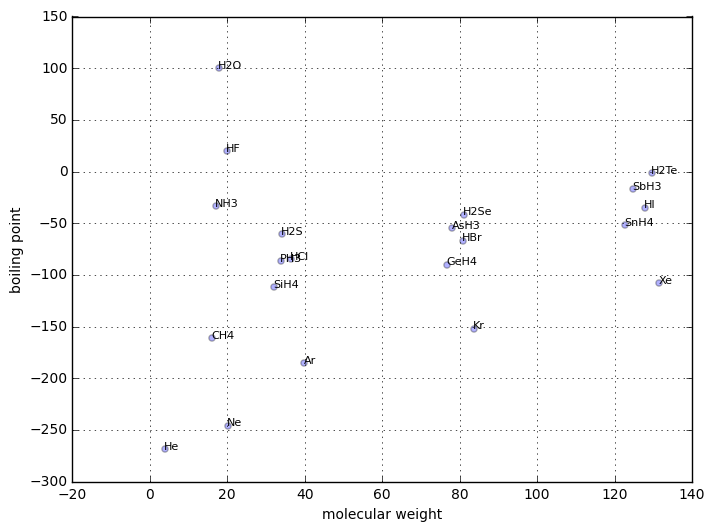

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
# 散布図
plt.figure(figsize=(8,6))
plt.scatter(X, Y, alpha=0.3)
for name, x, y in zip(df.loc[:, ['molecule']].as_matrix(), X, Y):
    plt.text(x, y, name[0], size=8)
plt.xlabel('molecular weight')
plt.ylabel('boiling point')
plt.grid()
plt.show()

# まずは一番便利な scikit-learn から

In [5]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [6]:
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
# 回帰係数
lr.coef_

array([ 0.55956295])

In [8]:
# 切片
lr.intercept_

-117.75943870102266

In [9]:
print("y = f(x) = wx + t; (w, t) = ({0}, {1})".format(lr.coef_[0], lr.intercept_))

y = f(x) = wx + t; (w, t) = (0.5595629540025041, -117.75943870102266)


In [10]:
# 決定係数R2
lr.score(X, Y)

0.083634989644543967

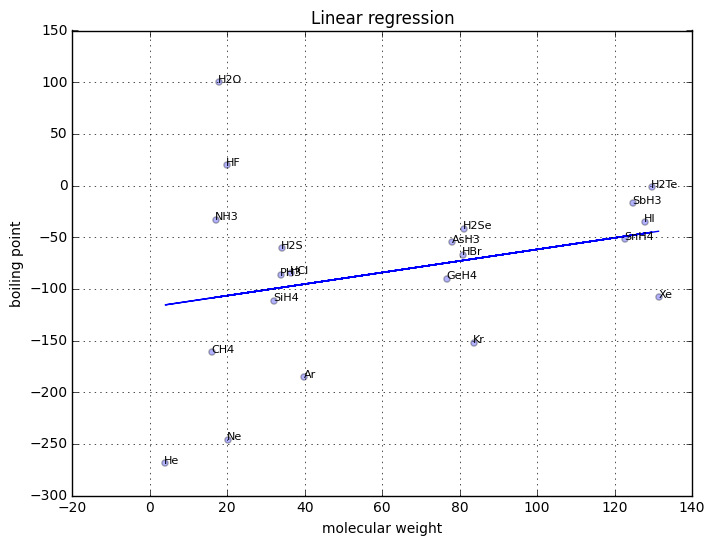

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
# 散布図
plt.figure(figsize=(8,6))
plt.scatter(X, Y, alpha=0.3)
 
# 回帰直線
plt.title('Linear regression')
plt.plot(X, lr.predict(X))
for name, x, y in zip(df.loc[:, ['molecule']].as_matrix(), X, Y):
    plt.text(x, y, name[0], size=8)
plt.xlabel('molecular weight')
plt.ylabel('boiling point')
plt.grid()
plt.show()

In [12]:
lr.predict(200)

array([-5.8468479])

In [13]:
lr.predict([[150], [100]])

array([-33.8249956, -61.8031433])

# 次は、ガチPythonで。

In [14]:
# 平均値を求める関数
def mean(list):
    sum = 0
    for x in list:
        sum += x
    return sum / len(list)

In [15]:
# 分散を求める関数
def variance(list):
    ave = mean(list)
    sum = 0
    for x in list:
        sum += (x - ave) ** 2
    return sum / len(list)

In [16]:
# 標準偏差を求める関数
import math
def standard_deviation(list):
    return math.sqrt(variance(list))

In [17]:
# 共分散 = 偏差積の平均
def covariance(list1, list2): 
    mean1 = mean(list1)
    mean2 = mean(list2)
    sum = 0
    for d1, d2 in zip(list1, list2):
        sum += (d1 - mean1) * (d2 - mean2)
    return sum / len(list1)

In [18]:
# 相関係数 = 共分散を list1, list2 の標準偏差で割ったもの
def correlation(list1, list2):
    return covariance(list1, list2) / (standard_deviation(list1) * standard_deviation(list2))

In [19]:
# 回帰直線の傾き＝相関係数＊（（yの標準偏差）／（xの標準偏差））
def w_fit(xlist, ylist):
    return correlation(xlist, ylist) * standard_deviation(ylist) / standard_deviation(xlist)

In [20]:
# y切片＝yの平均－（傾き＊xの平均）
def t_fit(xlist, ylist):
    return mean(ylist) - w_fit(xlist, ylist) * mean(xlist)

In [21]:
# 回帰直線の式を表示
w = w_fit(X, Y)
t = t_fit(X, Y)
print("y = f(x) = wx + t; (w, t) = ({0}, {1})".format(w, t))

y = f(x) = wx + t; (w, t) = ([ 0.55956295], [-117.7594387])


In [22]:
# 回帰直線の式を関数として表現
def f(x):
    return w * x + t

In [23]:
f(200)

array([-5.8468479])

In [24]:
f([[150], [100]])

array([[-33.8249956],
       [-61.8031433]])

In [25]:
# 決定係数R2
def r2(xlist, ylist):
    wa1 = 0.
    wa2 = 0.
    for x, y in zip(xlist, ylist):
        wa1 += (y - f(x))**2
        wa2 += (y - mean(ylist))**2
    return 1. - wa1 / wa2

In [26]:
r2(X, Y)

array([ 0.08363499])

# さて、表計算で解けと言われたので pandas で書いてみましょうか。

In [27]:
import copy
from IPython.display import display
excel = copy.deepcopy(df)
excel

,molecule,boiling point,molecular weight
0,HF,19.500,20.0
1,HCl,-84.900,36.5
2,HBr,-67.000,80.9
3,HI,-35.100,127.9
4,H2O,100.000,18.0
5,H2S,-60.700,34.1
6,H2Se,-42.000,81.0
7,H2Te,-1.800,129.6
8,NH3,-33.400,17.0
9,PH3,-87.000,34.0


In [28]:
excel['y'] = excel['boiling point']
excel['x'] = excel['molecular weight']
mean_y = mean(excel['y'])
mean_x = mean(excel['x'])
display(excel, pd.DataFrame([[mean_y, mean_x]], columns=['y','x'], index=['mean']))

,molecule,boiling point,molecular weight,y,x
0,HF,19.500,20.0,19.500,20.0
1,HCl,-84.900,36.5,-84.900,36.5
2,HBr,-67.000,80.9,-67.000,80.9
3,HI,-35.100,127.9,-35.100,127.9
4,H2O,100.000,18.0,100.000,18.0
5,H2S,-60.700,34.1,-60.700,34.1
6,H2Se,-42.000,81.0,-42.000,81.0
7,H2Te,-1.800,129.6,-1.800,129.6
8,NH3,-33.400,17.0,-33.400,17.0
9,PH3,-87.000,34.0,-87.000,34.0


,y,x
mean,-82.898667,62.3


In [29]:
excel['y-mean(y)'] = [y - mean_y for y in excel['y']]
excel['x-mean(x)'] = [x - mean_x for x in excel['x']]
display(excel, pd.DataFrame([[mean_y, mean_x]], columns=['y','x'], index=['mean']))

,molecule,boiling point,molecular weight,y,x,y-mean(y),x-mean(x)
0,HF,19.500,20.0,19.500,20.0,102.398667,-42.3
1,HCl,-84.900,36.5,-84.900,36.5,-2.001333,-25.8
2,HBr,-67.000,80.9,-67.000,80.9,15.898667,18.6
3,HI,-35.100,127.9,-35.100,127.9,47.798667,65.6
4,H2O,100.000,18.0,100.000,18.0,182.898667,-44.3
5,H2S,-60.700,34.1,-60.700,34.1,22.198667,-28.2
6,H2Se,-42.000,81.0,-42.000,81.0,40.898667,18.7
7,H2Te,-1.800,129.6,-1.800,129.6,81.098667,67.3
8,NH3,-33.400,17.0,-33.400,17.0,49.498667,-45.3
9,PH3,-87.000,34.0,-87.000,34.0,-4.101333,-28.3


,y,x
mean,-82.898667,62.3


In [30]:
excel['(y-mean(y))**2'] = [sa ** 2 for sa in excel['y-mean(y)']]
excel['(x-mean(x))**2'] = [sa ** 2 for sa in excel['x-mean(x)']]
display(excel, pd.DataFrame([[mean_y, mean_x]], columns=['y','x'], index=['mean']))

,molecule,boiling point,molecular weight,y,x,y-mean(y),x-mean(x),(y-mean(y))**2,(x-mean(x))**2
0,HF,19.500,20.0,19.500,20.0,102.398667,-42.3,10485.486935,1789.29
1,HCl,-84.900,36.5,-84.900,36.5,-2.001333,-25.8,4.005335,665.64
2,HBr,-67.000,80.9,-67.000,80.9,15.898667,18.6,252.767602,345.96
3,HI,-35.100,127.9,-35.100,127.9,47.798667,65.6,2284.712535,4303.36
4,H2O,100.000,18.0,100.000,18.0,182.898667,-44.3,33451.922268,1962.49
5,H2S,-60.700,34.1,-60.700,34.1,22.198667,-28.2,492.780802,795.24
6,H2Se,-42.000,81.0,-42.000,81.0,40.898667,18.7,1672.700935,349.69
7,H2Te,-1.800,129.6,-1.800,129.6,81.098667,67.3,6576.993735,4529.29
8,NH3,-33.400,17.0,-33.400,17.0,49.498667,-45.3,2450.118002,2052.09
9,PH3,-87.000,34.0,-87.000,34.0,-4.101333,-28.3,16.820935,800.89


,y,x
mean,-82.898667,62.3


In [31]:
variance_y = mean(excel['(y-mean(y))**2'])
variance_x = mean(excel['(x-mean(x))**2'])
sd_y = math.sqrt(variance_y)
sd_x = math.sqrt(variance_x)
display(excel, pd.DataFrame([[mean_y, mean_x], [variance_y, variance_x], [sd_y, sd_x]], 
                            columns=['y','x'], index=['mean', 'variance', 'sd']))

,molecule,boiling point,molecular weight,y,x,y-mean(y),x-mean(x),(y-mean(y))**2,(x-mean(x))**2
0,HF,19.500,20.0,19.500,20.0,102.398667,-42.3,10485.486935,1789.29
1,HCl,-84.900,36.5,-84.900,36.5,-2.001333,-25.8,4.005335,665.64
2,HBr,-67.000,80.9,-67.000,80.9,15.898667,18.6,252.767602,345.96
3,HI,-35.100,127.9,-35.100,127.9,47.798667,65.6,2284.712535,4303.36
4,H2O,100.000,18.0,100.000,18.0,182.898667,-44.3,33451.922268,1962.49
5,H2S,-60.700,34.1,-60.700,34.1,22.198667,-28.2,492.780802,795.24
6,H2Se,-42.000,81.0,-42.000,81.0,40.898667,18.7,1672.700935,349.69
7,H2Te,-1.800,129.6,-1.800,129.6,81.098667,67.3,6576.993735,4529.29
8,NH3,-33.400,17.0,-33.400,17.0,49.498667,-45.3,2450.118002,2052.09
9,PH3,-87.000,34.0,-87.000,34.0,-4.101333,-28.3,16.820935,800.89


,y,x
mean,-82.898667,62.300000
variance,7050.465101,1883.249524
sd,83.967048,43.396423


In [32]:
excel['(y-mean(y)) * (x-mean(x))'] = excel['y-mean(y)'] * excel['x-mean(x)']
display(excel, pd.DataFrame([[mean_y, mean_x], [variance_y, variance_x], [sd_y, sd_x]], 
                            columns=['y','x'], index=['mean', 'variance', 'sd']))

,molecule,boiling point,molecular weight,y,x,y-mean(y),x-mean(x),(y-mean(y))**2,(x-mean(x))**2,(y-mean(y)) * (x-mean(x))
0,HF,19.500,20.0,19.500,20.0,102.398667,-42.3,10485.486935,1789.29,-4331.463600
1,HCl,-84.900,36.5,-84.900,36.5,-2.001333,-25.8,4.005335,665.64,51.634400
2,HBr,-67.000,80.9,-67.000,80.9,15.898667,18.6,252.767602,345.96,295.715200
3,HI,-35.100,127.9,-35.100,127.9,47.798667,65.6,2284.712535,4303.36,3135.592533
4,H2O,100.000,18.0,100.000,18.0,182.898667,-44.3,33451.922268,1962.49,-8102.410933
5,H2S,-60.700,34.1,-60.700,34.1,22.198667,-28.2,492.780802,795.24,-626.002400
6,H2Se,-42.000,81.0,-42.000,81.0,40.898667,18.7,1672.700935,349.69,764.805067
7,H2Te,-1.800,129.6,-1.800,129.6,81.098667,67.3,6576.993735,4529.29,5457.940267
8,NH3,-33.400,17.0,-33.400,17.0,49.498667,-45.3,2450.118002,2052.09,-2242.289600
9,PH3,-87.000,34.0,-87.000,34.0,-4.101333,-28.3,16.820935,800.89,116.067733


,y,x
mean,-82.898667,62.300000
variance,7050.465101,1883.249524
sd,83.967048,43.396423


In [33]:
covar_xy = mean(excel['(y-mean(y)) * (x-mean(x))'])
corr_xy = covar_xy / (sd_x * sd_y)
display(excel, pd.DataFrame([[mean_y, mean_x], [variance_y, variance_x], [sd_y, sd_x]], 
                            columns=['y','x'], index=['mean', 'variance', 'sd']),
       pd.DataFrame([covar_xy, corr_xy], index=['covariance', 'correlation'], columns=['x,y']))

,molecule,boiling point,molecular weight,y,x,y-mean(y),x-mean(x),(y-mean(y))**2,(x-mean(x))**2,(y-mean(y)) * (x-mean(x))
0,HF,19.500,20.0,19.500,20.0,102.398667,-42.3,10485.486935,1789.29,-4331.463600
1,HCl,-84.900,36.5,-84.900,36.5,-2.001333,-25.8,4.005335,665.64,51.634400
2,HBr,-67.000,80.9,-67.000,80.9,15.898667,18.6,252.767602,345.96,295.715200
3,HI,-35.100,127.9,-35.100,127.9,47.798667,65.6,2284.712535,4303.36,3135.592533
4,H2O,100.000,18.0,100.000,18.0,182.898667,-44.3,33451.922268,1962.49,-8102.410933
5,H2S,-60.700,34.1,-60.700,34.1,22.198667,-28.2,492.780802,795.24,-626.002400
6,H2Se,-42.000,81.0,-42.000,81.0,40.898667,18.7,1672.700935,349.69,764.805067
7,H2Te,-1.800,129.6,-1.800,129.6,81.098667,67.3,6576.993735,4529.29,5457.940267
8,NH3,-33.400,17.0,-33.400,17.0,49.498667,-45.3,2450.118002,2052.09,-2242.289600
9,PH3,-87.000,34.0,-87.000,34.0,-4.101333,-28.3,16.820935,800.89,116.067733


,y,x
mean,-82.898667,62.300000
variance,7050.465101,1883.249524
sd,83.967048,43.396423


,"x,y"
covariance,1053.796667
correlation,0.289197


In [34]:
w = corr_xy * sd_y / sd_x
t = mean_y - w * mean_x
display(excel, pd.DataFrame([[mean_y, mean_x], [variance_y, variance_x], [sd_y, sd_x]], 
                            columns=['y','x'], index=['mean', 'variance', 'sd']),
        pd.DataFrame([covar_xy, corr_xy], index=['covariance', 'correlation'], columns=['x,y']),
        pd.DataFrame([[w, t]], columns=["w", "t"], index=["y = f(x) = wx + t"]))

,molecule,boiling point,molecular weight,y,x,y-mean(y),x-mean(x),(y-mean(y))**2,(x-mean(x))**2,(y-mean(y)) * (x-mean(x))
0,HF,19.500,20.0,19.500,20.0,102.398667,-42.3,10485.486935,1789.29,-4331.463600
1,HCl,-84.900,36.5,-84.900,36.5,-2.001333,-25.8,4.005335,665.64,51.634400
2,HBr,-67.000,80.9,-67.000,80.9,15.898667,18.6,252.767602,345.96,295.715200
3,HI,-35.100,127.9,-35.100,127.9,47.798667,65.6,2284.712535,4303.36,3135.592533
4,H2O,100.000,18.0,100.000,18.0,182.898667,-44.3,33451.922268,1962.49,-8102.410933
5,H2S,-60.700,34.1,-60.700,34.1,22.198667,-28.2,492.780802,795.24,-626.002400
6,H2Se,-42.000,81.0,-42.000,81.0,40.898667,18.7,1672.700935,349.69,764.805067
7,H2Te,-1.800,129.6,-1.800,129.6,81.098667,67.3,6576.993735,4529.29,5457.940267
8,NH3,-33.400,17.0,-33.400,17.0,49.498667,-45.3,2450.118002,2052.09,-2242.289600
9,PH3,-87.000,34.0,-87.000,34.0,-4.101333,-28.3,16.820935,800.89,116.067733


,y,x
mean,-82.898667,62.300000
variance,7050.465101,1883.249524
sd,83.967048,43.396423


,"x,y"
covariance,1053.796667
correlation,0.289197


,w,t
y = f(x) = wx + t,0.559563,-117.759439


In [35]:
# 回帰直線の式を関数として表現
def f(x):
    return w * x + t

In [36]:
excel['f(x)'] = f(excel['x'])
display(excel, pd.DataFrame([[mean_y, mean_x], [variance_y, variance_x], [sd_y, sd_x]], 
                            columns=['y','x'], index=['mean', 'variance', 'sd']),
        pd.DataFrame([covar_xy, corr_xy], index=['covariance', 'correlation'], columns=['x,y']),
        pd.DataFrame([[w, t]], columns=["w", "t"], index=["y = f(x) = wx + t"]))

,molecule,boiling point,molecular weight,y,x,y-mean(y),x-mean(x),(y-mean(y))**2,(x-mean(x))**2,(y-mean(y)) * (x-mean(x)),f(x)
0,HF,19.500,20.0,19.500,20.0,102.398667,-42.3,10485.486935,1789.29,-4331.463600,-106.568180
1,HCl,-84.900,36.5,-84.900,36.5,-2.001333,-25.8,4.005335,665.64,51.634400,-97.335391
2,HBr,-67.000,80.9,-67.000,80.9,15.898667,18.6,252.767602,345.96,295.715200,-72.490796
3,HI,-35.100,127.9,-35.100,127.9,47.798667,65.6,2284.712535,4303.36,3135.592533,-46.191337
4,H2O,100.000,18.0,100.000,18.0,182.898667,-44.3,33451.922268,1962.49,-8102.410933,-107.687306
5,H2S,-60.700,34.1,-60.700,34.1,22.198667,-28.2,492.780802,795.24,-626.002400,-98.678342
6,H2Se,-42.000,81.0,-42.000,81.0,40.898667,18.7,1672.700935,349.69,764.805067,-72.434839
7,H2Te,-1.800,129.6,-1.800,129.6,81.098667,67.3,6576.993735,4529.29,5457.940267,-45.240080
8,NH3,-33.400,17.0,-33.400,17.0,49.498667,-45.3,2450.118002,2052.09,-2242.289600,-108.246868
9,PH3,-87.000,34.0,-87.000,34.0,-4.101333,-28.3,16.820935,800.89,116.067733,-98.734298


,y,x
mean,-82.898667,62.300000
variance,7050.465101,1883.249524
sd,83.967048,43.396423


,"x,y"
covariance,1053.796667
correlation,0.289197


,w,t
y = f(x) = wx + t,0.559563,-117.759439


In [37]:
excel['(y-f(x))**2'] = (excel['y'] - excel['f(x)'])**2
display(excel, pd.DataFrame([[mean_y, mean_x], [variance_y, variance_x], [sd_y, sd_x]], 
                            columns=['y','x'], index=['mean', 'variance', 'sd']),
        pd.DataFrame([covar_xy, corr_xy], index=['covariance', 'correlation'], columns=['x,y']),
        pd.DataFrame([[w, t]], columns=["w", "t"], index=["y = f(x) = wx + t"]))

,molecule,boiling point,molecular weight,y,x,y-mean(y),x-mean(x),(y-mean(y))**2,(x-mean(x))**2,(y-mean(y)) * (x-mean(x)),f(x),(y-f(x))**2
0,HF,19.500,20.0,19.500,20.0,102.398667,-42.3,10485.486935,1789.29,-4331.463600,-106.568180,15893.185913
1,HCl,-84.900,36.5,-84.900,36.5,-2.001333,-25.8,4.005335,665.64,51.634400,-97.335391,154.638946
2,HBr,-67.000,80.9,-67.000,80.9,15.898667,18.6,252.767602,345.96,295.715200,-72.490796,30.148838
3,HI,-35.100,127.9,-35.100,127.9,47.798667,65.6,2284.712535,4303.36,3135.592533,-46.191337,123.017754
4,H2O,100.000,18.0,100.000,18.0,182.898667,-44.3,33451.922268,1962.49,-8102.410933,-107.687306,43134.016878
5,H2S,-60.700,34.1,-60.700,34.1,22.198667,-28.2,492.780802,795.24,-626.002400,-98.678342,1442.354459
6,H2Se,-42.000,81.0,-42.000,81.0,40.898667,18.7,1672.700935,349.69,764.805067,-72.434839,926.279451
7,H2Te,-1.800,129.6,-1.800,129.6,81.098667,67.3,6576.993735,4529.29,5457.940267,-45.240080,1887.040538
8,NH3,-33.400,17.0,-33.400,17.0,49.498667,-45.3,2450.118002,2052.09,-2242.289600,-108.246868,5602.053722
9,PH3,-87.000,34.0,-87.000,34.0,-4.101333,-28.3,16.820935,800.89,116.067733,-98.734298,137.693756


,y,x
mean,-82.898667,62.300000
variance,7050.465101,1883.249524
sd,83.967048,43.396423


,"x,y"
covariance,1053.796667
correlation,0.289197


,w,t
y = f(x) = wx + t,0.559563,-117.759439


In [38]:
r2 = 1. - sum(excel['(y-f(x))**2']) / sum(excel['(y-mean(y))**2'])
display(excel, pd.DataFrame([[mean_y, mean_x], [variance_y, variance_x], [sd_y, sd_x]], 
                            columns=['y','x'], index=['mean', 'variance', 'sd']),
        pd.DataFrame([covar_xy, corr_xy], index=['covariance', 'correlation'], columns=['x,y']),
        pd.DataFrame([[w, t, r2]], columns=["w", "t", "R2"], index=["y = f(x) = wx + t"]))

,molecule,boiling point,molecular weight,y,x,y-mean(y),x-mean(x),(y-mean(y))**2,(x-mean(x))**2,(y-mean(y)) * (x-mean(x)),f(x),(y-f(x))**2
0,HF,19.500,20.0,19.500,20.0,102.398667,-42.3,10485.486935,1789.29,-4331.463600,-106.568180,15893.185913
1,HCl,-84.900,36.5,-84.900,36.5,-2.001333,-25.8,4.005335,665.64,51.634400,-97.335391,154.638946
2,HBr,-67.000,80.9,-67.000,80.9,15.898667,18.6,252.767602,345.96,295.715200,-72.490796,30.148838
3,HI,-35.100,127.9,-35.100,127.9,47.798667,65.6,2284.712535,4303.36,3135.592533,-46.191337,123.017754
4,H2O,100.000,18.0,100.000,18.0,182.898667,-44.3,33451.922268,1962.49,-8102.410933,-107.687306,43134.016878
5,H2S,-60.700,34.1,-60.700,34.1,22.198667,-28.2,492.780802,795.24,-626.002400,-98.678342,1442.354459
6,H2Se,-42.000,81.0,-42.000,81.0,40.898667,18.7,1672.700935,349.69,764.805067,-72.434839,926.279451
7,H2Te,-1.800,129.6,-1.800,129.6,81.098667,67.3,6576.993735,4529.29,5457.940267,-45.240080,1887.040538
8,NH3,-33.400,17.0,-33.400,17.0,49.498667,-45.3,2450.118002,2052.09,-2242.289600,-108.246868,5602.053722
9,PH3,-87.000,34.0,-87.000,34.0,-4.101333,-28.3,16.820935,800.89,116.067733,-98.734298,137.693756


,y,x
mean,-82.898667,62.300000
variance,7050.465101,1883.249524
sd,83.967048,43.396423


,"x,y"
covariance,1053.796667
correlation,0.289197


,w,t,R2
y = f(x) = wx + t,0.559563,-117.759439,0.083635
